In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split as tts

In [42]:
data=pd.read_csv('Hacking_squad_dataset.txt')
data=np.array(data)
data
X=data[:,0:10]
Y=data[:,10]

In [43]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs

In [45]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,0.910000,0.910000
1,0.900000,0.899985
2,0.910000,0.910000
3,0.917856,0.917856
4,0.926657,0.926657


In [46]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,0.910000,0.910000
1,0.900000,0.900955
2,0.910000,0.910000
3,0.917856,0.916044
4,0.926657,0.926657


In [47]:
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_linear.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,0.910000,0.910462
1,0.900000,0.905610
2,0.910000,0.911626
3,0.917856,0.911742
4,0.926657,0.928600


In [48]:
polyRegressor = PolynomialFeatures(degree=3)
X_train_poly = polyRegressor.fit_transform(X_train)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = lr()
poly.fit(X_train_poly, Y_train)
Y_pred = poly.predict(X_test_poly)
Y_compare_poly = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_poly.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,0.910000,0.907957
1,0.900000,0.904868
2,0.910000,0.910804
3,0.917856,0.914664
4,0.926657,0.927064


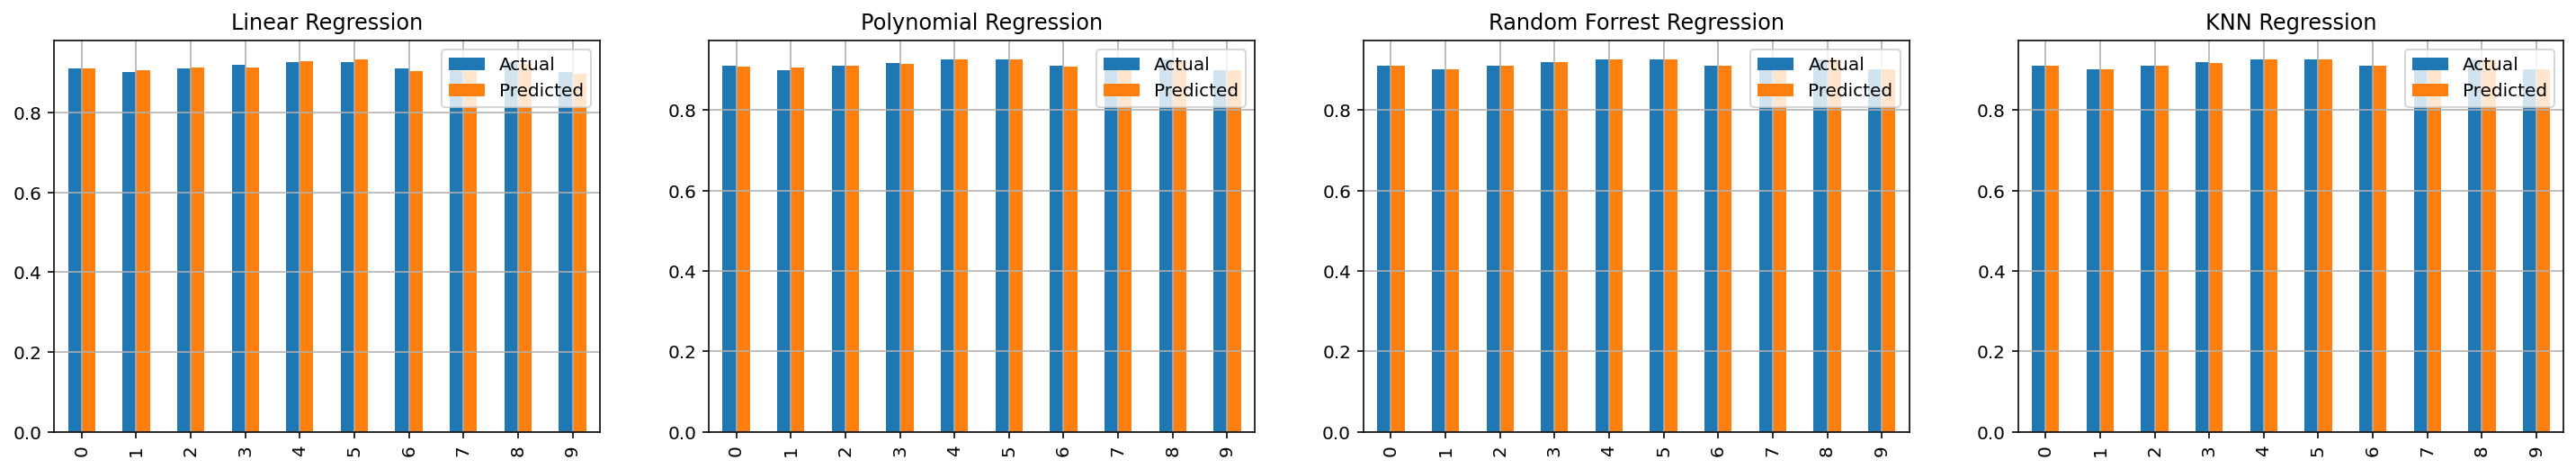

In [52]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind='bar', title='Linear Regression', grid=True, ax=ax[0])
Y_compare_poly.head(10).plot(kind='bar', title='Polynomial Regression', grid=True, ax=ax[1])
Y_compare_randomforrest.head(10).plot(kind='bar', title='Random Forrest Regression', grid=True, ax=ax[2])
Y_compare_knn.head(10).plot(kind='bar', title='KNN Regression', grid=True, ax=ax[3])
plt.show()

In [53]:
print('According to R squared scorring method we got below scores for out machine learning models:')
modelNames = ['Linear', 'Polynomial', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [linear, poly, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
for i in models['modelRegressors']:
  if i is poly:
    accuracy = cvs(i, X_train_poly, Y_train, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
  else:
    accuracy = cvs(i, X_train, Y_train, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
  counter+=1

According to R squared scorring method we got below scores for out machine learning models:
Accuracy of Linear Regression model is 0.89


Accuracy of Polynomial Regression model is 0.96


Accuracy of Random Forrest Regression model is 1.00
Accuracy of K-Nearest Neighbour Regression model is 0.98


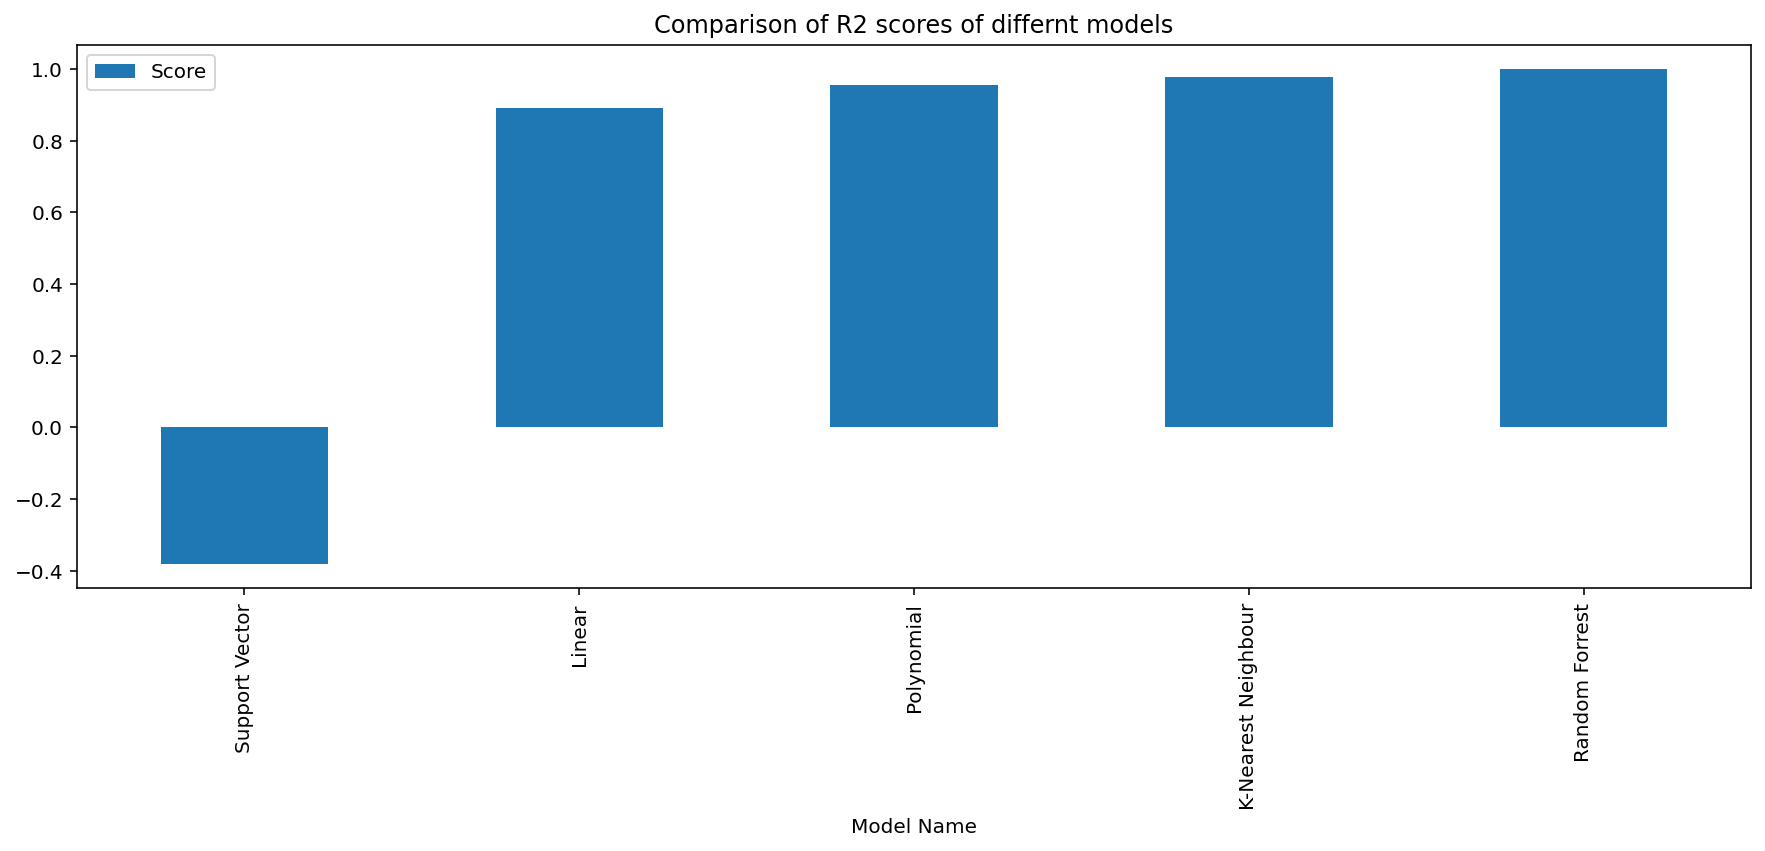

In [35]:
pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,5), title='Comparison of R2 scores of differnt models', )
plt.show()